# Working with the FMNIST dataset


In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [6]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [ ]:
# class Net(nn.Module):
#     def init(self):
#         super(Net, self).init()
#         self.conv1 = nn.Conv2d(3, 32, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(32, 16, 5)
#         self.fc1 = nn.Linear(165353, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 2)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(x.shape[0], -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         x = F.log_softmax(x, dim=1)
#         return x

In [15]:
# class FMNIST(nn.Module):
#     def init(self, num_classes):
#         super().init()

#         # Instantiate the ReLU nonlinearity
#         self.relu = nn.ReLU()

#         # Instantiate two convolutional layers
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

#         # Instantiate a max pooling layer
#         self.pool = nn.MaxPool2d(2, 2)

#         # Instantiate a fully connected layer
#         self.fc = nn.Linear(7 * 7 * 10, 10)

#     def forward(self, x):

#         # Apply conv followd by relu, then in next line pool
#         x = self.relu(self.conv1(x))
#         x = self.pool(x)

#         # Apply conv followd by relu, then in next line pool
#         x = self.relu(self.conv2(x))
#         x = self.pool(x)
#         x = self.relu(self.conv3(x))

#         # Prepare the image for the fully connected layer
#         x = x.view(-1, 7710)

#         # Apply the fully connected layer and return the result
#         #x=self.relu(self.fc(x))
#         return x#relu(self.fc(x))
# model = FMNIST()

In [4]:
#print(model(images))

In [7]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0179784404379981
Training loss: 0.5624172556629059
Training loss: 0.4932174568872716


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(testloader))

test_image_id = 52
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

<BarContainer object of 10 artists>

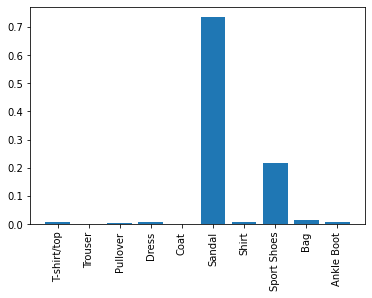

In [14]:
ps = torch.exp(logps)
nps = ps.numpy()[0]
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

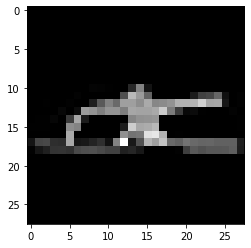

In [15]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')